In [1]:
import os

import pandas as pd
import numpy as np

import missingno as msno

In [2]:
DATA_PATH = "../data/"

In [3]:
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## 1. Importamos os dados

In [4]:
cols = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "income-per-year"
]

In [5]:
df_train = pd.read_csv(os.path.join(DATA_PATH, "adult.data"), names=cols)
df_test = pd.read_csv(os.path.join(DATA_PATH, "adult.test"), names=cols, skiprows=1)

In [6]:
df_train.shape, df_test.shape

((32561, 15), (16281, 15))

In [7]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-per-year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-per-year
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


## 2. Análise Exploratória

2) Analyze features, missing data, and overall characteristics of the dataset (using tools in sklearn). Select features, discretize numerical features, handle missing data. 

In [9]:
sorted(df_train.columns)

['age',
 'capital-gain',
 'capital-loss',
 'education',
 'education-num',
 'fnlwgt',
 'hours-per-week',
 'income-per-year',
 'marital-status',
 'native-country',
 'occupation',
 'race',
 'relationship',
 'sex',
 'workclass']

In [10]:
df_train.describe() # para features numéricas

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000,32561.000,32561.000,32561.000,32561.000,32561.000
mean,38.582,189778.367,10.081,1077.649,87.304,40.437
std,13.640,105549.978,2.573,7385.292,402.960,12.347
min,17.000,12285.000,1.000,0.000,0.000,1.000
25%,28.000,117827.000,9.000,0.000,0.000,40.000
50%,37.000,178356.000,10.000,0.000,0.000,40.000
75%,48.000,237051.000,12.000,0.000,0.000,45.000
max,90.000,1484705.000,16.000,99999.000,4356.000,99.000


In [13]:
df_train.select_dtypes(include='object').describe() # para features categóricas

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income-per-year
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


Vamos verificar cada uma das features categóricas.

In [14]:
df_train["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [21]:
df_train["education"].value_counts(dropna=False)

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [22]:
df_train["marital-status"].value_counts(dropna=False)

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [23]:
df_train["occupation"].value_counts(dropna=False)

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [24]:
df_train["relationship"].value_counts(dropna=False)

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [25]:
df_train["sex"].value_counts(dropna=False)

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [26]:
df_train["native-country"].value_counts(dropna=False)

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [27]:
df_train["income-per-year"].value_counts(dropna=False)

 <=50K    24720
 >50K      7841
Name: income-per-year, dtype: int64

Vou aplicar remoção de espaços em cada campo categórico

In [62]:
for col in df_train.select_dtypes(include='object').columns:
    df_train[col] = df_train[col].str.strip()

Vamos ver a distribuição de nulos. Como os nulos foram representados por "?", vamos fazer um replace e verificar quantos nulos temos

In [64]:
df_train = df_train.replace('?', np.nan)

<AxesSubplot:>

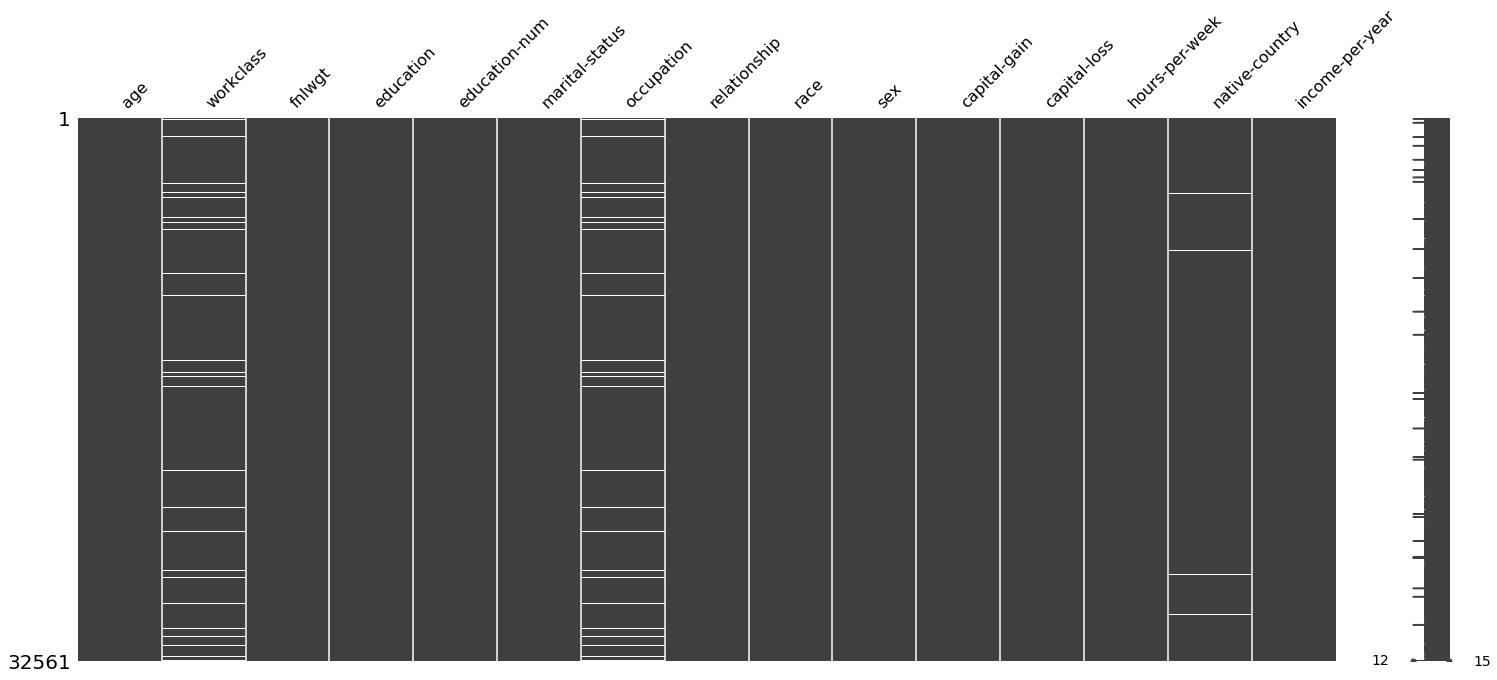

In [66]:
msno.matrix(df_train)

In [69]:
(df_train.isna().sum() / len(df_train)).sort_values(ascending=False)

occupation        0.057
workclass         0.056
native-country    0.018
age               0.000
fnlwgt            0.000
education         0.000
education-num     0.000
marital-status    0.000
relationship      0.000
race              0.000
sex               0.000
capital-gain      0.000
capital-loss      0.000
hours-per-week    0.000
income-per-year   0.000
dtype: float64